In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree

from sklearn.metrics import  classification_report, confusion_matrix, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('fetal_health.csv')
df.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

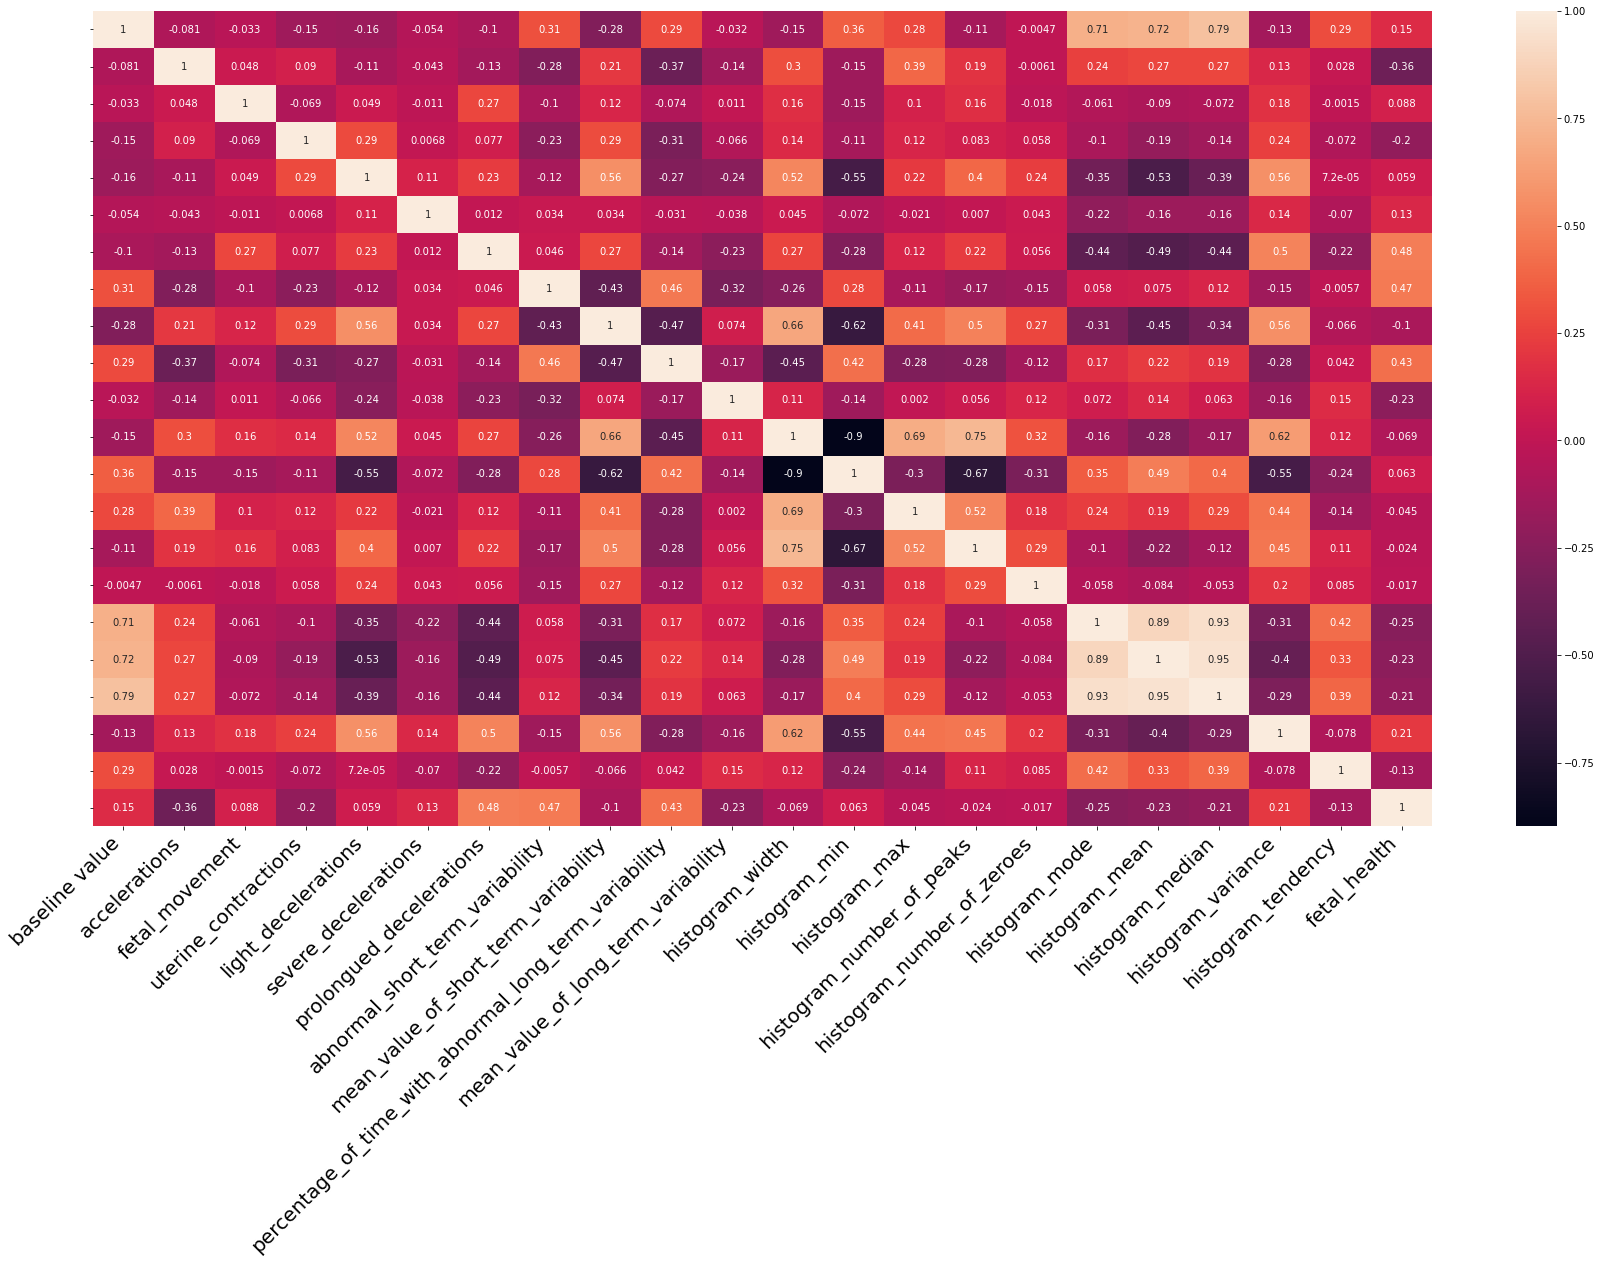

In [4]:
plt.subplots(figsize = (30, 15))
ax = sns.heatmap(df.corr(), annot = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45,horizontalalignment = 'right', fontsize = 20)
ax.set_yticklabels([])
plt.show()

In [5]:
key = 'fetal_health'
corrs = df.corr()[key]
new_cols = []
for l in corrs:
    if l in sorted(corrs, key = abs)[-11:]:
        new_cols.append(corrs.index.values[list(corrs).index(l)])
df = df[new_cols]       

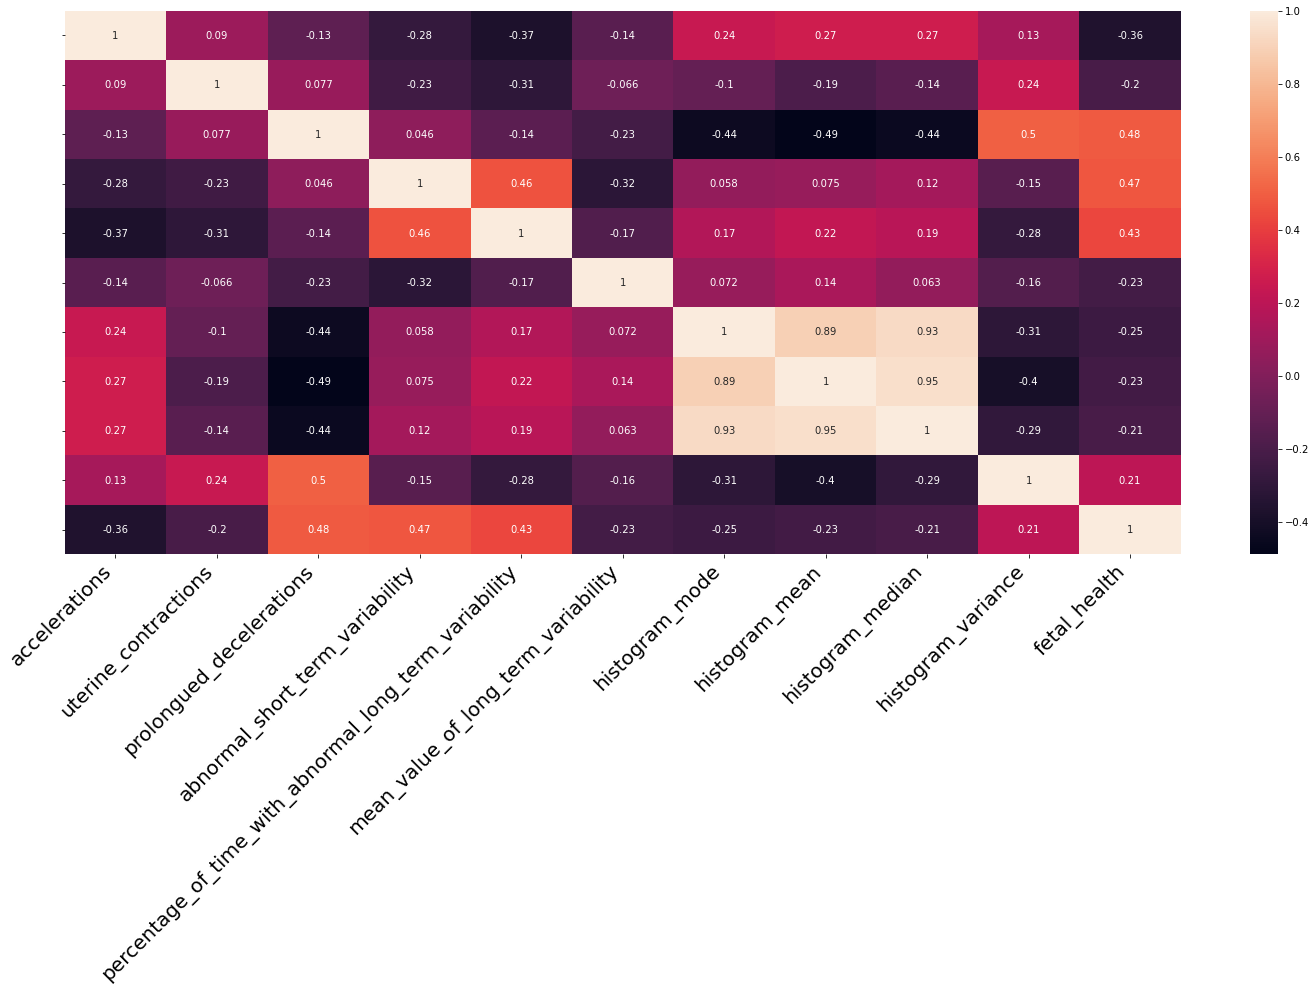

In [6]:
plt.subplots(figsize = (25, 10))
ax = sns.heatmap(df.corr(), annot = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45,horizontalalignment = 'right', fontsize = 20)
ax.set_yticklabels([])
plt.show()

In [7]:
df.nunique()

accelerations                                              20
uterine_contractions                                       16
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_mode                                             88
histogram_mean                                            103
histogram_median                                           95
histogram_variance                                        133
fetal_health                                                3
dtype: int64

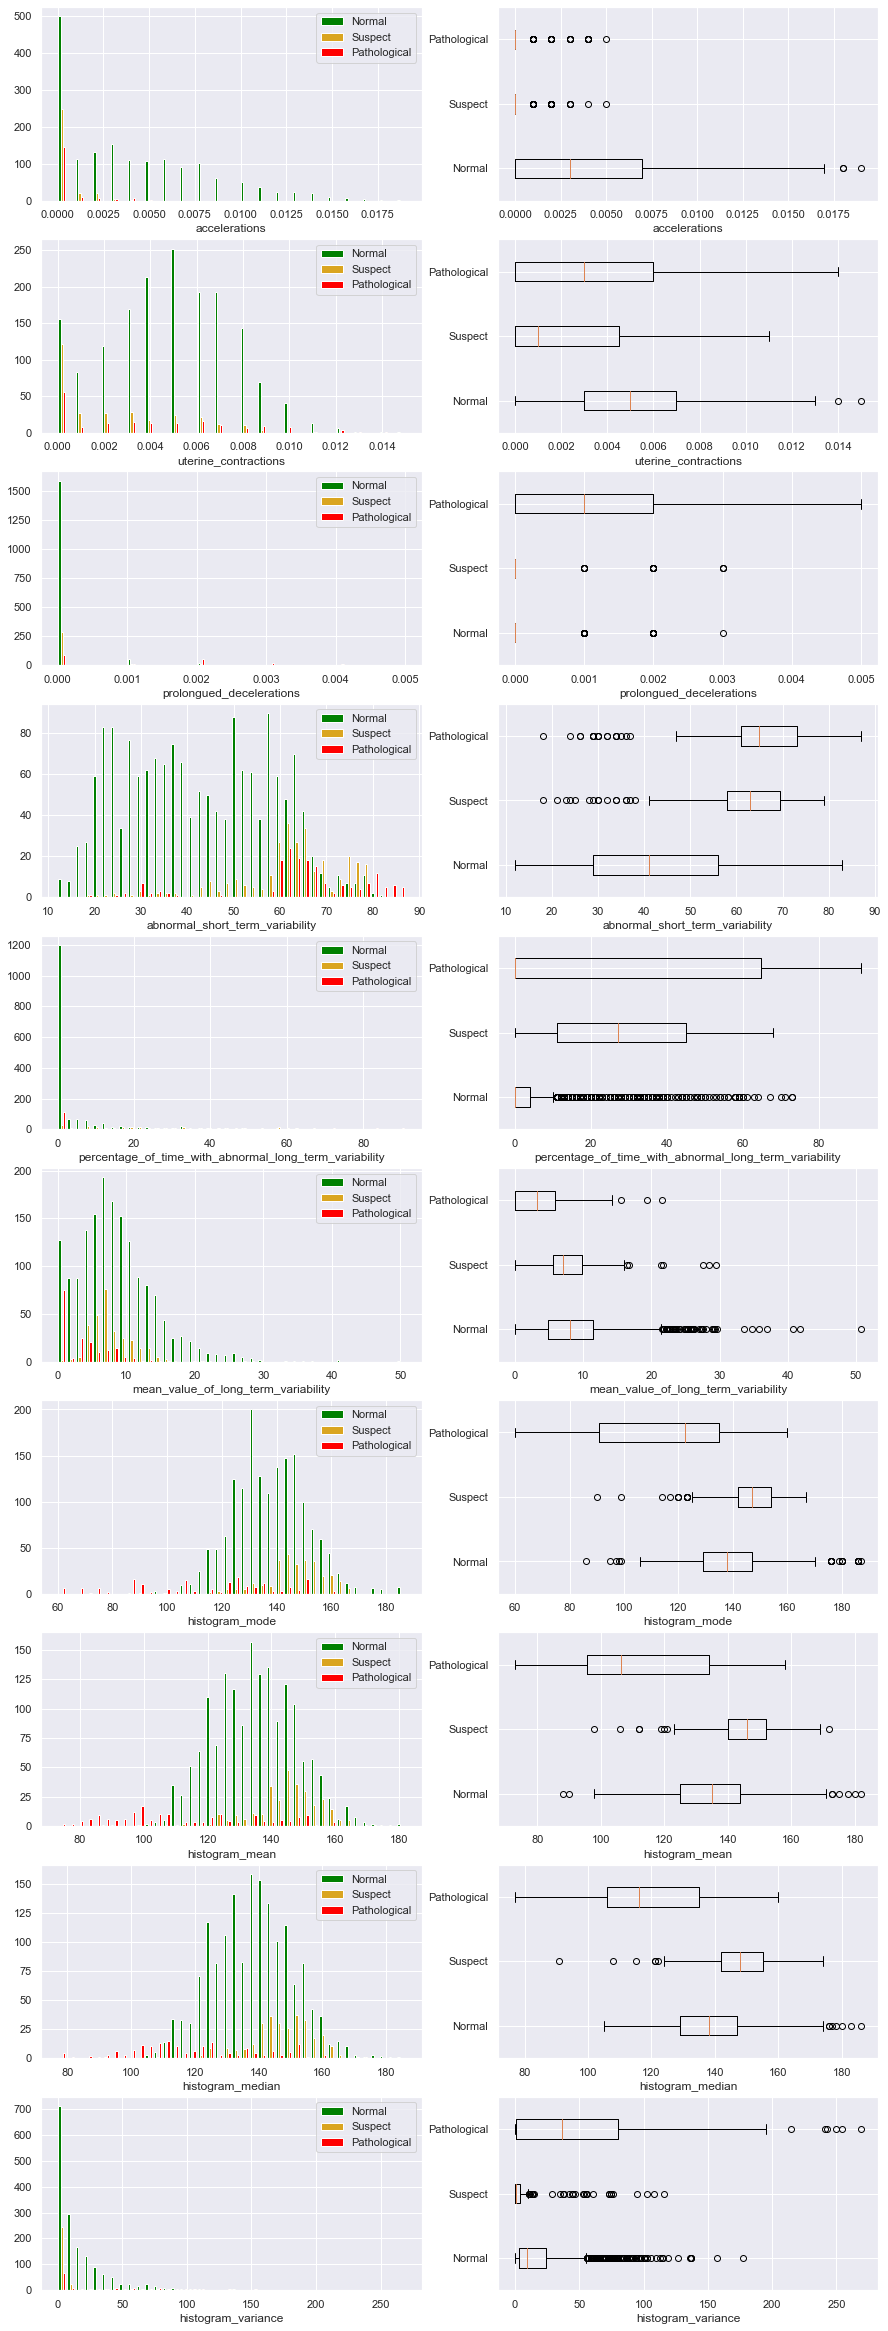

In [8]:
labels = ['Normal', 'Suspect', 'Pathological']
sns.set(style = 'darkgrid')
plt.subplots(figsize = (15, 42))
p = 1
for col in df.columns[:-1]:
    data = [df[col][df[key] == j] for j in range(1, 4)]
    plt.subplot(10, 2, p)
    plt.hist(data, bins = 40, color = ['green', 'goldenrod', 'red'], label = labels)
    plt.xlabel(col)
    plt.legend()
    plt.subplot(10, 2, p + 1)
    plt.boxplot(data, vert = 0)
    plt.yticks([1, 2, 3], labels)
    plt.xlabel(col)
    p += 2

In [9]:
data  = StandardScaler().fit_transform(df[df.columns[:-1]])
x_train, x_test, y_train, y_test = train_test_split(data, df[key].values, train_size = 0.75)

#### Knn

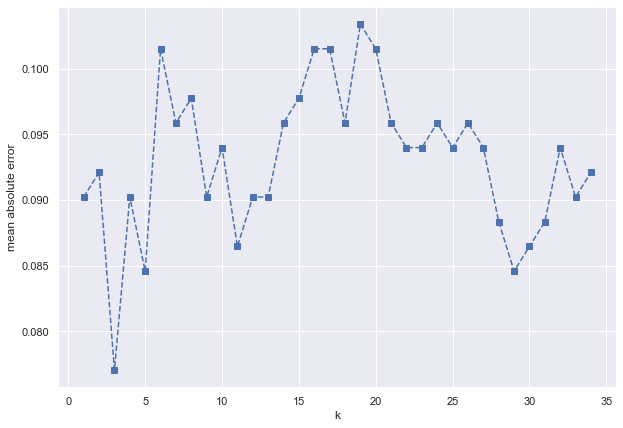

In [10]:
errors = []
for i in range(1, 35):
    model = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    errors.append(mean_absolute_error(y_test, y_pred))
plt.subplots(figsize = (10, 7))
plt.plot([i for i in range(1, 35)], errors, 's', linestyle = '--')
plt.xlabel('k')
plt.ylabel('mean absolute error')
plt.show()

In [11]:
model = KNeighborsClassifier(n_neighbors = errors.index(min(errors)) + 1).fit(x_train, y_train)
y_pred = model.predict(x_test)

In [54]:
confusion_matrix(y_pred, y_test)

array([[420,  14,   2],
       [  4,  59,   2],
       [  0,   1,  30]], dtype=int64)

In [13]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       432
         2.0       0.74      0.80      0.77        69
         3.0       0.85      0.94      0.89        31

    accuracy                           0.93       532
   macro avg       0.86      0.89      0.87       532
weighted avg       0.93      0.93      0.93       532



#### Decision tree


In [39]:
my_tree = DecisionTreeClassifier(criterion = 'gini').fit(x_train, y_train)
y_pred = my_tree.predict(x_test)

In [40]:
confusion_matrix(y_pred, y_test)

array([[401,  12,   2],
       [ 21,  61,   4],
       [  2,   1,  28]], dtype=int64)

In [41]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       415
         2.0       0.82      0.71      0.76        86
         3.0       0.82      0.90      0.86        31

    accuracy                           0.92       532
   macro avg       0.86      0.86      0.86       532
weighted avg       0.92      0.92      0.92       532



In [42]:
#plt.figure(figsize = (12, 10))
#tree.plot_tree(my_tree)
#plt.show()

#### RandomForest

In [20]:
accuracies = []
for i in range(2, 30):
    forest = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    y_pred = forest.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))
model = RandomForestClassifier(n_estimators = accuracies.index(max(accuracies)) + 2, criterion = 'gini').fit(x_train, y_train)
y_pred = model.predict(x_test)

In [21]:
confusion_matrix(y_pred, y_test)

array([[417,  14,   2],
       [  6,  59,   2],
       [  1,   1,  30]], dtype=int64)

In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       433
         2.0       0.80      0.88      0.84        67
         3.0       0.88      0.94      0.91        32

    accuracy                           0.95       532
   macro avg       0.89      0.93      0.91       532
weighted avg       0.95      0.95      0.95       532



#### SVM


In [23]:
params = {'C': [0.1, 1, 10, 100, 1000],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVC(), params).fit(x_train, y_train)

In [27]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [28]:
model = SVC(kernel = grid.best_params_['kernel'], C = grid.best_params_['C'], 
            gamma = grid.best_params_['gamma']).fit(x_train, y_train)
y_pred = model.predict(x_test)

In [29]:
confusion_matrix(y_pred, y_test)

array([[411,  17,   2],
       [ 13,  55,   4],
       [  0,   2,  28]], dtype=int64)

In [30]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         1.0       0.97      0.96      0.96       430
         2.0       0.74      0.76      0.75        72
         3.0       0.82      0.93      0.87        30

    accuracy                           0.93       532
   macro avg       0.85      0.88      0.86       532
weighted avg       0.93      0.93      0.93       532



#### AdaBoost


In [43]:
model = AdaBoostClassifier(base_estimator = my_tree).fit(x_train, y_train)
y_pred = model.predict(x_test)

In [44]:
confusion_matrix(y_pred, y_test)

array([[420,  14,   2],
       [  4,  59,   2],
       [  0,   1,  30]], dtype=int64)

In [45]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         1.0       0.99      0.96      0.98       436
         2.0       0.80      0.91      0.85        65
         3.0       0.88      0.97      0.92        31

    accuracy                           0.96       532
   macro avg       0.89      0.95      0.92       532
weighted avg       0.96      0.96      0.96       532

